In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

# Load dataset
dataset = load_dataset("Hello-SimpleAI/HC3", "all")
df = pd.DataFrame(dataset["train"])

# Explode the human and ChatGPT answers so that each answer gets its own row
df = df.explode("human_answers").explode("chatgpt_answers")

# Create a new DataFrame for human and ChatGPT answers separately
df_human = pd.DataFrame({"text": df["human_answers"], "classification": 1})
df_chatgpt = pd.DataFrame({"text": df["chatgpt_answers"], "classification": 0})

# Concatenate both DataFrames
df_combined = pd.concat([df_human, df_chatgpt], ignore_index=True)

# Drop NaN values that might result from the explosion
df_combined = df_combined.dropna().reset_index(drop=True)

df = df_combined

print(df)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                                     text  classification
0       Basically there are many categories of " Best ...               1
1       If you 're hearing about it , it 's because it...               1
2       One reason is lots of catagories . However , h...               1
3       salt is good for not dying in car crashes and ...               1
4       In Minnesota and North Dakota , they tend to u...               1
...                                                   ...             ...
121806  It's not uncommon for blood pressure to fluctu...               0
121807  There are several possible causes of a painles...               0
121808  It is not appropriate for me to recommend a sp...               0
121809  It is not uncommon for people with rheumatoid ...               0
121810  It is not uncommon to experience back pain, es...               0

[121811 rows x 2 columns]


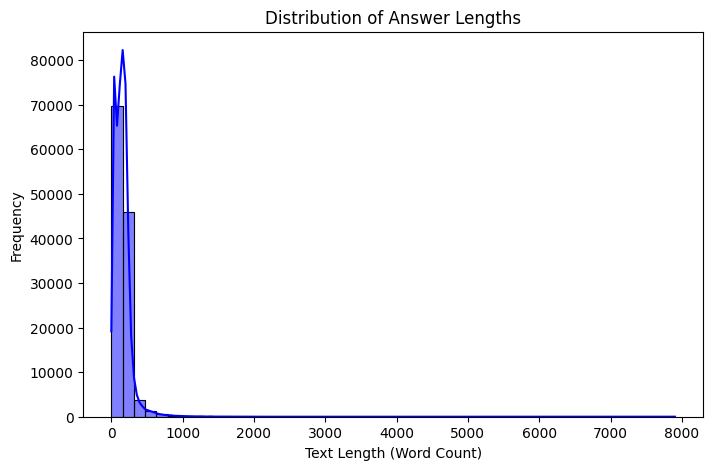

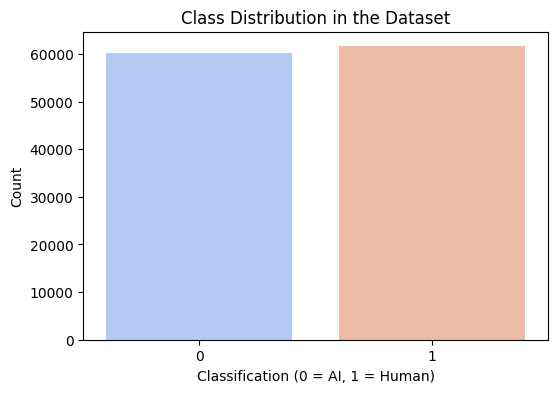


=== Class Distribution ===
 Class  Count
     1  61588
     0  60223


In [2]:
# Check dataset structure
num_rows, num_columns = df.shape
column_names = df.columns.tolist()

# Descriptive statistics of text lengths
df["text_length"] = df["text"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Number of tokens & vocabulary size
all_tokens = nltk.word_tokenize(" ".join(df["text"].dropna()))
num_tokens = len(all_tokens)
vocab_size = len(set(all_tokens))

# Basic statistics
text_stats = df["text_length"].describe()

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=50, kde=True, color="blue")
plt.xlabel("Text Length (Word Count)")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Lengths")
plt.show()

# Class Distribution (AI vs Human)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["classification"], hue=df["classification"], palette="coolwarm", legend=False)
plt.xlabel("Classification (0 = AI, 1 = Human)")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")
plt.show()

class_counts = df["classification"].value_counts().reset_index()
class_counts.columns = ["Class", "Count"]
print("\n=== Class Distribution ===")
print(class_counts.to_string(index=False))

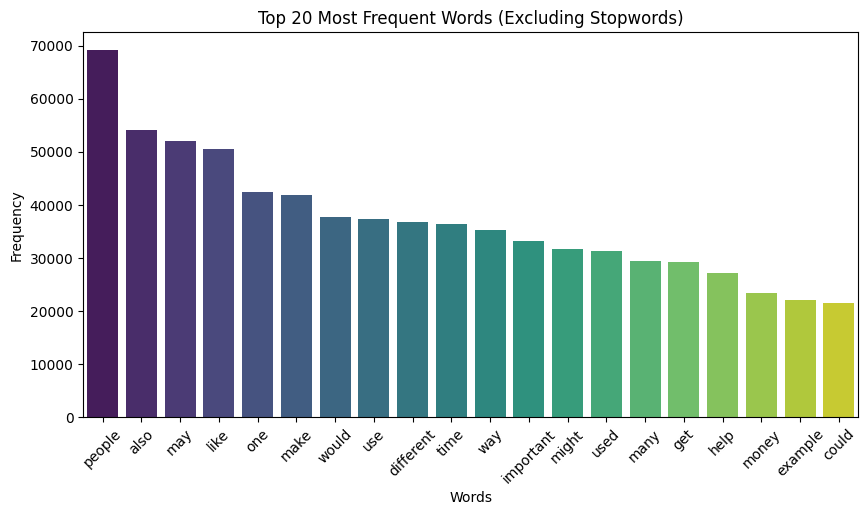


=== Sentence Length Statistics ===
Statistic         Value
    count 121811.000000
     mean      6.874929
      std      5.836360
      min      0.000000
      25%      4.000000
      50%      6.000000
      75%      9.000000
      max    361.000000


In [3]:
# Most Frequent Words (Stopwords Removed)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in all_tokens if word.isalpha() and word.lower() not in stop_words]
word_freq = Counter(filtered_tokens).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), hue=list(words), palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

# Sentence Length Statistics
df["sentence_count"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)) if isinstance(x, str) else 0)
sentence_stats = df["sentence_count"].describe()

sentence_stats_df = pd.DataFrame(sentence_stats).reset_index().rename(columns={"index": "Statistic", "sentence_count": "Value"})

print("\n=== Sentence Length Statistics ===")
print(sentence_stats_df.to_string(index=False))

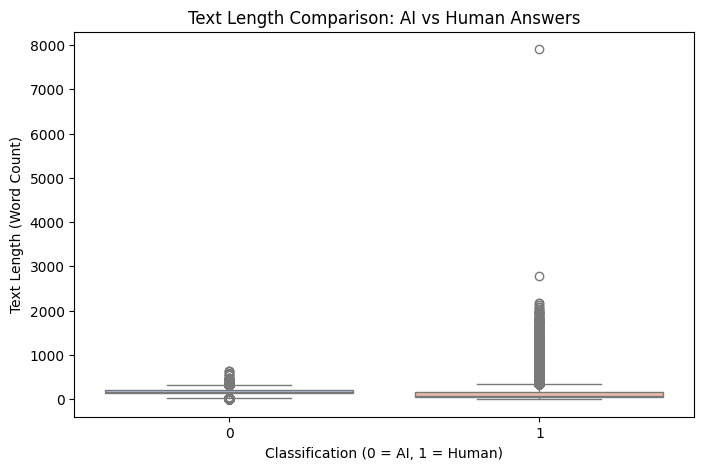

=== EDA Summary ===
           Metric                  Value
   Number of Rows                 121811
Number of Columns                      2
 Names of Columns [text, classification]
     Total Tokens               19913751
  Vocabulary Size                 145161

=== Text Length Statistics ===
Statistic         Value
    count 121811.000000
     mean    152.021230
      std    124.087712
      min      0.000000
      25%     73.000000
      50%    141.000000
      75%    199.000000
      max   7904.000000


In [4]:
# Compare Text Length for AI vs Human Responses
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["classification"], y=df["text_length"], hue=df["classification"], palette="coolwarm", legend=False)
plt.xlabel("Classification (0 = AI, 1 = Human)")
plt.ylabel("Text Length (Word Count)")
plt.title("Text Length Comparison: AI vs Human Answers")
plt.show()

# Create a DataFrame for EDA summary
eda_summary = pd.DataFrame({
    "Metric": ["Number of Rows", "Number of Columns", "Names of Columns", "Total Tokens", "Vocabulary Size"],
    "Value": [num_rows, num_columns, column_names, num_tokens, vocab_size]
})

# Display the descriptive statistics
text_stats_df = pd.DataFrame(text_stats).reset_index().rename(columns={"index": "Statistic", "text_length": "Value"})

# Show EDA Summary and Text Length Statistics
print("=== EDA Summary ===")
print(eda_summary.to_string(index=False))

print("\n=== Text Length Statistics ===")
print(text_stats_df.to_string(index=False))